<a href="https://colab.research.google.com/github/ishumann/Coding-Implementation/blob/main/CatvsDogsCnn_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
 ! pip install -q kaggle

In [5]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"imprime","key":"ca9360fba8beabaa892bb7075b2dc89a"}'}

In [6]:
 ! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [7]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.06G/1.06G [00:15<00:00, 67.4MB/s]
100% 1.06G/1.06G [00:15<00:00, 74.3MB/s]


In [8]:

import zipfile


In [9]:

zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()


In [10]:
!pwd

/content


In [11]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense , BatchNormalization, Dropout
# from tensorflow.keras. import Classification_report, confusion_metrix
import matplotlib.pyplot as plt



In [ ]:
train_ds =  keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode ="int",
    batch_size = 32, # how many imgs will be loded into ram at a time and goes into algorithm
    image_size = (256,256) # it will std the data shape

)

validation_ds =  keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode ="int",
    batch_size = 32,
    image_size = (256,256)

) # it will store data in numpy array

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# normalize the data from 0 to 256 to 0 to 1. for easy and fast calculation and good results.

def process(image, label ):
    image = tf.cast(image/255, tf.float32)
    return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)


In [ ]:
# create CNN Model
model = Sequential([
    Conv2D(32, kernel_size =(3,3),padding='valid', activation='relu',input_shape=(256,256,3)),
    MaxPooling2D(pool_size=(2,2),strides=2, padding='valid'),

    Conv2D(64, kernel_size =(3,3),padding='valid', activation='relu'),
    MaxPooling2D(pool_size=(2,2),strides=(2,2), padding='valid'),

    Conv2D(128, kernel_size =(3,3),padding='valid', activation='relu'),
    MaxPooling2D(pool_size=(2,2),strides=(2,2), padding='valid'),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')

])



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [ ]:

model.compile( loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=1e-3), metrics=['accuracy'])
history= model.fit(epochs=5,batch_size=32, x=train_ds, validation_data= validation_ds,validation_split=0.2)

Epoch 1/5
625/625 [==============================] - 65s 92ms/step - loss: 0.6323 - accuracy: 0.6345 - val_loss: 0.5267 - val_accuracy: 0.7458
Epoch 2/5
625/625 [==============================] - 56s 90ms/step - loss: 0.4771 - accuracy: 0.7667 - val_loss: 0.4537 - val_accuracy: 0.7890
Epoch 3/5
625/625 [==============================] - 56s 89ms/step - loss: 0.3664 - accuracy: 0.8313 - val_loss: 0.4657 - val_accuracy: 0.7836
Epoch 4/5
625/625 [==============================] - 54s 87ms/step - loss: 0.2381 - accuracy: 0.8989 - val_loss: 0.5993 - val_accuracy: 0.7954
Epoch 5/5
625/625 [==============================] - 54s 87ms/step - loss: 0.1289 - accuracy: 0.9485 - val_loss: 0.8099 - val_accuracy: 0.7944


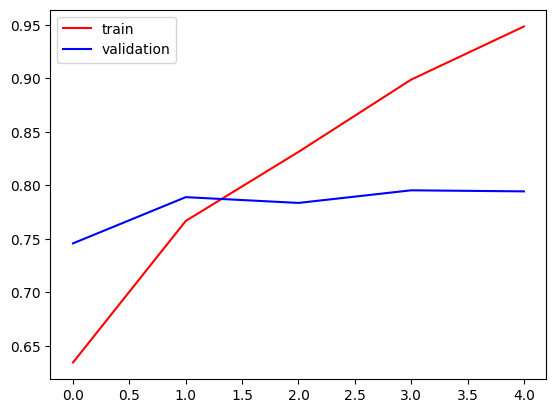

In [ ]:
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

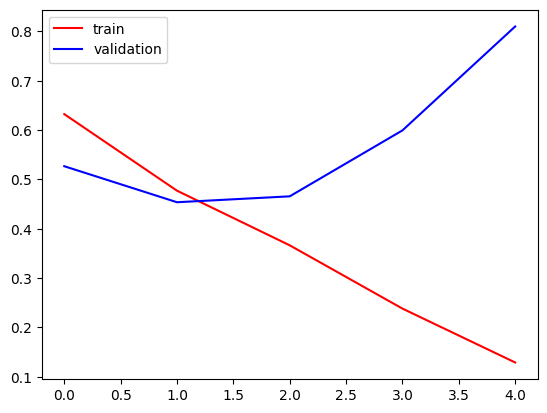

In [ ]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

# Takeways

* here its clear model is overfitting.

# Steps to manage overfitting.
* batch Normalization
* dropouts
* L2, L1 regularization
* add data
* prunning
* NAS - neural architecture
* Data AUgumentation
* transfer learning






# CNN Model With batch Normalization adn dropout

In [ ]:
# create CNN Model with batch normalization and dropout
model = Sequential([
    #convolution block_1
    Conv2D(10, kernel_size =(3,3),padding='valid', activation='relu',input_shape=(256,256,3)),
    MaxPooling2D(pool_size=(2,2),strides=2, padding='valid'),
    BatchNormalization(),

    #convolution block_2
    Conv2D(20, kernel_size =(3,3),padding='valid', activation='relu'),
    MaxPooling2D(pool_size=(2,2),strides=(2,2), padding='valid'),
    BatchNormalization(),

    #convolution block_3
    Conv2D(40, kernel_size =(3,3),padding='valid', activation='relu'),
    MaxPooling2D(pool_size=(2,2),strides=(2,2), padding='valid'),
    BatchNormalization(),


    Flatten(),
    Dense(128, activation='relu'),
    Dropout(.1),
    Dense(64, activation='relu'),
    Dropout(.1),
    Dense(32, activation='relu'),
    Dropout(.1),
    Dense(16, activation='relu'),
    Dropout(.1),
    Dense(1, activation='sigmoid')

])


In [ ]:

print(model.summary())


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 254, 254, 10)      280       
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 127, 127, 10)      0         
 ng2D)                                                           
                                                                 
 batch_normalization_14 (Ba  (None, 127, 127, 10)      40        
 tchNormalization)                                               
                                                                 
 conv2d_21 (Conv2D)          (None, 125, 125, 20)      1820      
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 62, 62, 20)        0         
 ng2D)                                                           
                                                      

In [ ]:

model.compile( loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=1e-3), metrics=['accuracy'])
history= model.fit(epochs=10,batch_size=32, x=train_ds, validation_data= validation_ds,validation_split=0.2)


Epoch 1/10
625/625 [==============================] - 90s 76ms/step - loss: 0.7109 - accuracy: 0.5753 - val_loss: 0.6784 - val_accuracy: 0.5890
Epoch 2/10
625/625 [==============================] - 45s 71ms/step - loss: 0.5441 - accuracy: 0.7185 - val_loss: 1.5212 - val_accuracy: 0.5234
Epoch 3/10
625/625 [==============================] - 48s 76ms/step - loss: 0.4382 - accuracy: 0.7994 - val_loss: 0.4847 - val_accuracy: 0.7764
Epoch 4/10
625/625 [==============================] - 45s 72ms/step - loss: 0.3361 - accuracy: 0.8519 - val_loss: 0.5193 - val_accuracy: 0.7390
Epoch 5/10
625/625 [==============================] - 49s 78ms/step - loss: 0.2420 - accuracy: 0.9002 - val_loss: 0.6458 - val_accuracy: 0.7642
Epoch 6/10
625/625 [==============================] - 47s 75ms/step - loss: 0.1586 - accuracy: 0.9400 - val_loss: 0.7584 - val_accuracy: 0.7896
Epoch 7/10
625/625 [==============================] - 46s 72ms/step - loss: 0.1006 - accuracy: 0.9635 - val_loss: 0.7515 - val_accuracy:

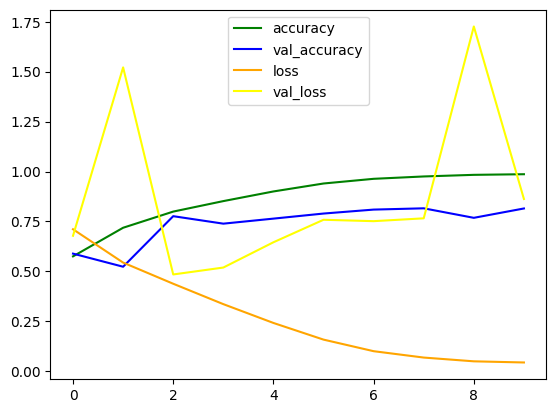

In [ ]:
plt.plot(history.history['accuracy'], color='green', label='accuracy')
plt.plot(history.history['val_accuracy'], color='blue', label='val_accuracy')
plt.plot(history.history['loss'], color='orange', label='loss')
plt.plot(history.history['val_loss'], color='yellow', label='val_loss')
plt.legend()
plt.show()

In [ ]:
import cv2
import urllib
import numpy as np

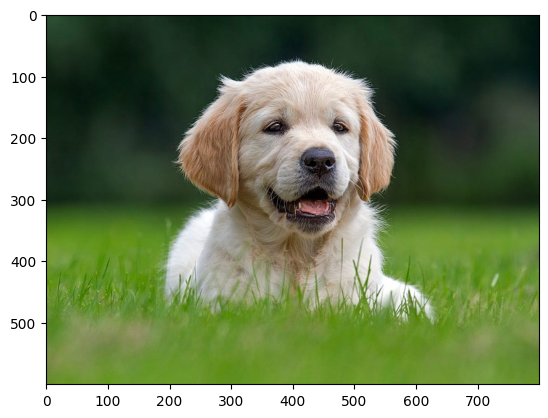

In [ ]:

# test_img = cv2.imread("https://www.bluecross.org.uk/sites/default/files/assets/images/124044lpr.jpg")

from skimage import io

image = io.imread('https://upload.wikimedia.org/wikipedia/commons/thumb/1/18/Dog_Breeds.jpg/800px-Dog_Breeds.jpg')
plt.imshow( image)

TypeError: Image data of dtype object cannot be converted to float

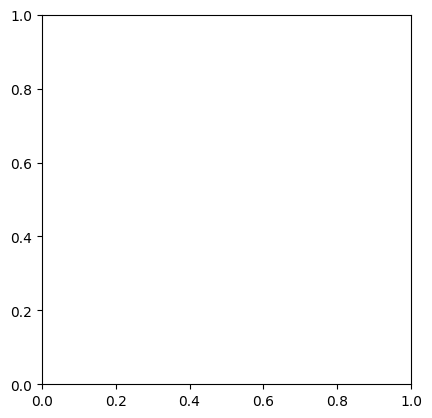

In [ ]:
# plt.imshow(test_img)

In [ ]:
image.shape

(600, 800, 3)

In [ ]:
image = cv2.resize(image,(256,256))
image_input= image.reshape((1,256,256,3))

In [ ]:
model.predict(image_input)

1/1 [==============================] - 0s 18ms/step


array([[1.]], dtype=float32)

# CNN Model With data Augumentation


In [13]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense , BatchNormalization, Dropout
from keras.preprocessing.image import ImageDataGenerator


In [22]:
batch_size = 32

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        '/content/train/',  # this is the target directory
        target_size=(256, 256),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        '/content/test/',
        target_size=(256, 256),
        batch_size=batch_size,)


Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


(1, 240, 240, 3)

In [23]:
# create CNN Model with batch normalization and dropout
model = Sequential([
    #convolution block_1
    Conv2D(10, kernel_size =(3,3),padding='valid', activation='relu',input_shape=(256,256,3)),
    MaxPooling2D(pool_size=(2,2),strides=2, padding='valid'),
    BatchNormalization(),

    #convolution block_2
    Conv2D(20, kernel_size =(3,3),padding='valid', activation='relu'),
    MaxPooling2D(pool_size=(2,2),strides=(2,2), padding='valid'),
    BatchNormalization(),

    #convolution block_3
    Conv2D(40, kernel_size =(3,3),padding='valid', activation='relu'),
    MaxPooling2D(pool_size=(2,2),strides=(2,2), padding='valid'),
    BatchNormalization(),


    Flatten(),
    Dense(128, activation='relu'),
    Dropout(.1),
    Dense(64, activation='relu'),
    Dropout(.1),
    Dense(32, activation='relu'),
    Dropout(.1),
    Dense(16, activation='relu'),
    Dropout(.1),
    Dense(1, activation='sigmoid')

])


In [24]:

print(model.summary())


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 10)      280       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 10)      0         
 g2D)                                                            
                                                                 
 batch_normalization_3 (Bat  (None, 127, 127, 10)      40        
 chNormalization)                                                
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 20)      1820      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 20)        0         
 g2D)                                                            
                                                      

In [25]:

model.compile( loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=1e-3), metrics=['accuracy'])
history= model.fit(epochs=10,batch_size=32, x=train_generator, validation_data= validation_generator)


Epoch 1/10
  5/625 [..............................] - ETA: 25:52 - loss: 0.9717 - accuracy: 0.5437

KeyboardInterrupt: 

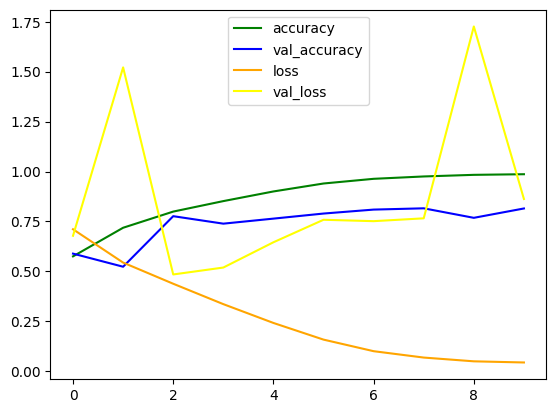

In [ ]:
plt.plot(history.history['accuracy'], color='green', label='accuracy')
plt.plot(history.history['val_accuracy'], color='blue', label='val_accuracy')
plt.plot(history.history['loss'], color='orange', label='loss')
plt.plot(history.history['val_loss'], color='yellow', label='val_loss')
plt.legend()
plt.show()

In [ ]:
import cv2
import urllib
import numpy as np

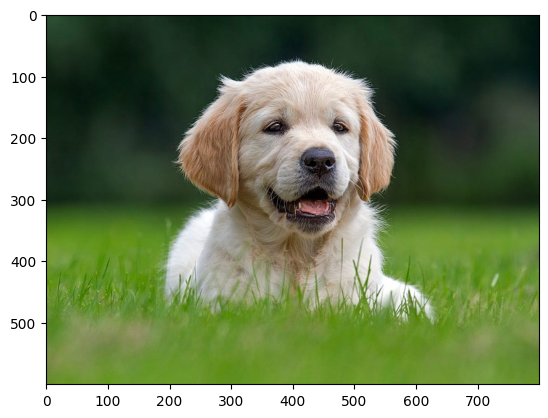

In [ ]:

# test_img = cv2.imread("https://www.bluecross.org.uk/sites/default/files/assets/images/124044lpr.jpg")

from skimage import io

image = io.imread('https://upload.wikimedia.org/wikipedia/commons/thumb/1/18/Dog_Breeds.jpg/800px-Dog_Breeds.jpg')
plt.imshow( image)

TypeError: Image data of dtype object cannot be converted to float

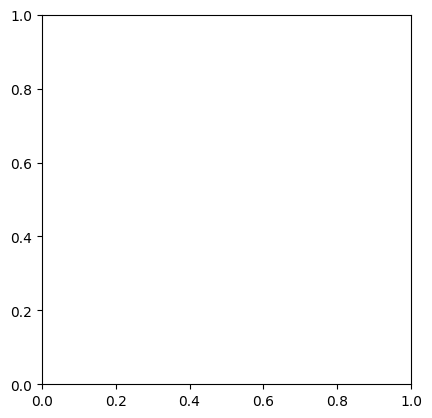

In [ ]:
# plt.imshow(test_img)

In [ ]:
image.shape

(600, 800, 3)

In [ ]:
image = cv2.resize(image,(256,256))
image_input= image.reshape((1,256,256,3))

In [ ]:
model.predict(image_input)

1/1 [==============================] - 0s 18ms/step


array([[1.]], dtype=float32)